In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
trader_df = pd.read_csv("historical_data.csv")
sentiment_df = pd.read_csv("fear_greed_index.csv")

In [4]:
print('Trader Data Preview:')
display(trader_df.head())



Trader Data Preview:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [5]:
print('Sentiment Data Preview:')
display(sentiment_df.head())


Sentiment Data Preview:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [ ]:
#  ----Clean Trader Data----
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'],format='%d-%m-%Y %H:%M')

trader_df['date'] = trader_df['Timestamp IST'].dt.date

trader_df.head(3)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02


In [7]:
# --- Clean Sentiment Data ---
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date

# Keep only the columns we need
sentiment_df = sentiment_df[['date', 'value', 'classification']]

sentiment_df.head(3)


,date,value,classification
0,2018-02-01,30,Fear
1,2018-02-02,15,Extreme Fear
2,2018-02-03,40,Fear


In [8]:
merged_df = pd.merge(trader_df,sentiment_df , on = 'date',how= 'left')

print("Merged Data Preview:")
display(merged_df.head(3))

print(f"\nShape:{merged_df.shape}")

Merged Data Preview:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,80.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,80.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,80.0,Extreme Greed



Shape:(211224, 19)


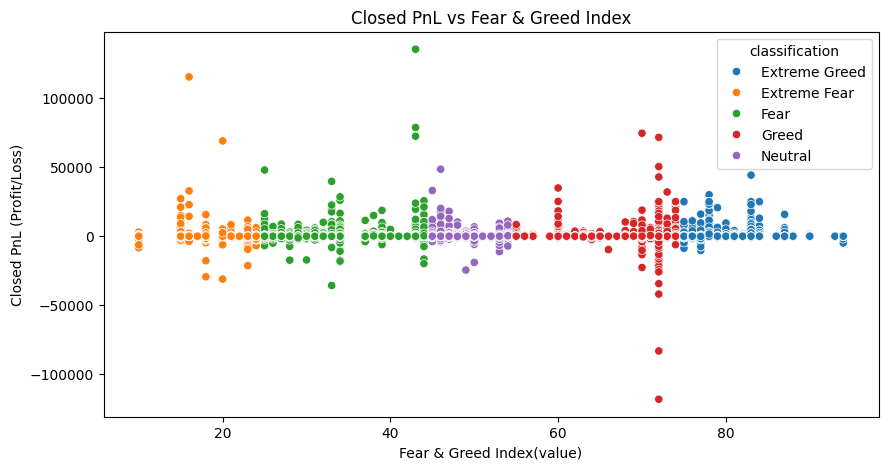

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,5))
sns.scatterplot(data = merged_df,x = 'value',y = 'Closed PnL',hue = 'classification')

plt.title("Closed PnL vs Fear & Greed Index")
plt.xlabel("Fear & Greed Index(value)")
plt.ylabel("Closed PnL (Profit/Loss)")
plt.show()

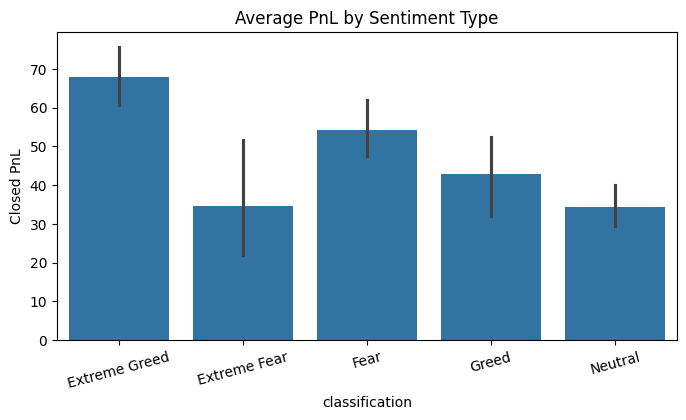

In [12]:
avg_pnl = merged_df.groupby('classification')['Closed PnL'].mean().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(data=merged_df,x='classification',y='Closed PnL')
plt.title("Average PnL by Sentiment Type")
plt.xticks(rotation=15)
plt.show()

In [13]:
correlation = merged_df['Closed PnL'].corr(merged_df['value'])
print(f"Correlation between Fear & Greed value and Closed PnL: {correlation:.3f}")

Correlation between Fear & Greed value and Closed PnL: 0.008


In [14]:
merged_df.head(3)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,80.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,80.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,80.0,Extreme Greed


In [15]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  datetime64[ns]
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

In [16]:
merged_df.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
date                0
value               6
classification      6
dtype: int64

In [17]:
merged_df.describe()


,Execution Price,Size Tokens,Size USD,Timestamp IST,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp,value
count,211224.000000,2.112240e+05,2.112240e+05,211224,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05,211218.000000
mean,11414.723350,4.623365e+03,5.639451e+03,2025-01-31 12:04:22.915009792,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12,51.649656
min,0.000005,8.740000e-07,0.000000e+00,2023-05-01 01:06:00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12,10.000000
25%,4.854700,2.940000e+00,1.937900e+02,2024-12-31 21:00:45,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12,33.000000
50%,18.280000,3.200000e+01,5.970450e+02,2025-02-24 18:55:00,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12,49.000000
75%,101.580000,1.879025e+02,2.058960e+03,2025-04-02 18:22:00,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12,72.000000
max,109004.000000,1.582244e+07,3.921431e+06,2025-05-01 12:13:00,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12,94.000000
std,29447.654868,1.042729e+05,3.657514e+04,NaN,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09,21.012784


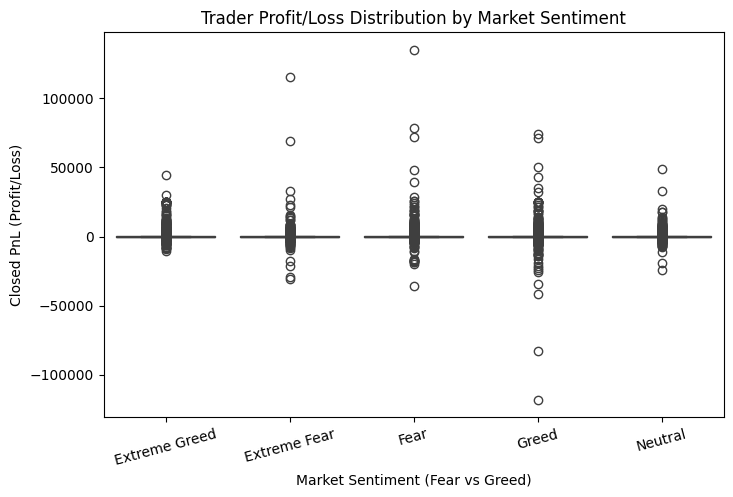

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(data=merged_df, x='classification', y='Closed PnL')
plt.title("Trader Profit/Loss Distribution by Market Sentiment")
plt.xlabel("Market Sentiment (Fear vs Greed)")
plt.ylabel("Closed PnL (Profit/Loss)")
plt.xticks(rotation=15)
plt.show()


In [19]:
corr = merged_df['Closed PnL'].corr(merged_df['value'])
print(f"Correlation between Fear & Greed value and trader Closed PnL: {corr:.3f}")


Correlation between Fear & Greed value and trader Closed PnL: 0.008


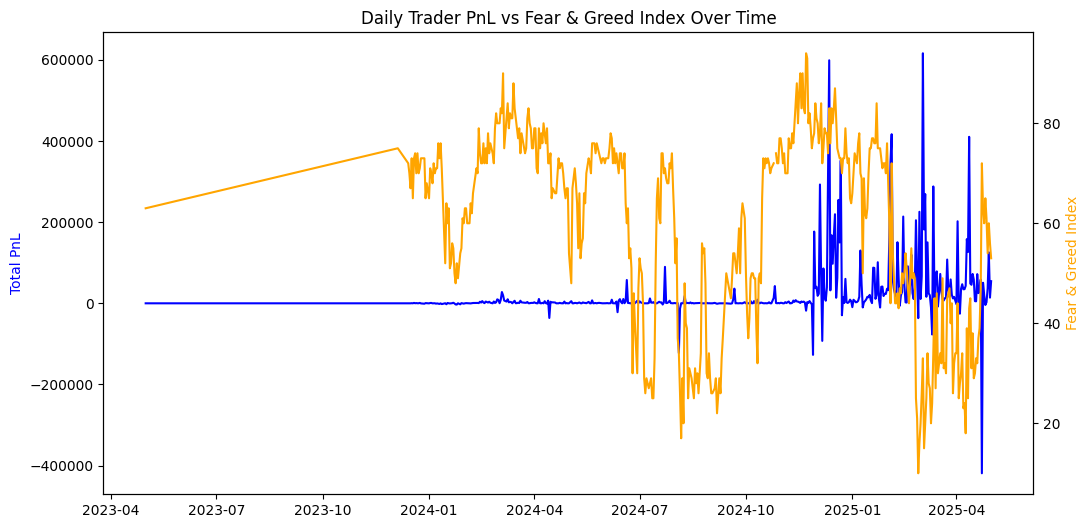

In [20]:
# Aggregate total daily profit/loss
daily_pnl = merged_df.groupby('date')['Closed PnL'].sum().reset_index()

# Add sentiment value for those dates
daily_pnl = pd.merge(daily_pnl, sentiment_df, on='date', how='left')

# Plot
fig, ax1 = plt.subplots(figsize=(12,6))

# Line 1: PnL
ax1.plot(daily_pnl['date'], daily_pnl['Closed PnL'], color='blue', label='Total Daily PnL')
ax1.set_ylabel('Total PnL', color='blue')

# Line 2: Sentiment (secondary axis)
ax2 = ax1.twinx()
ax2.plot(daily_pnl['date'], daily_pnl['value'], color='orange', label='Fear & Greed Index')
ax2.set_ylabel('Fear & Greed Index', color='orange')

plt.title('Daily Trader PnL vs Fear & Greed Index Over Time')
plt.show()


<Figure size 1200x600 with 0 Axes>

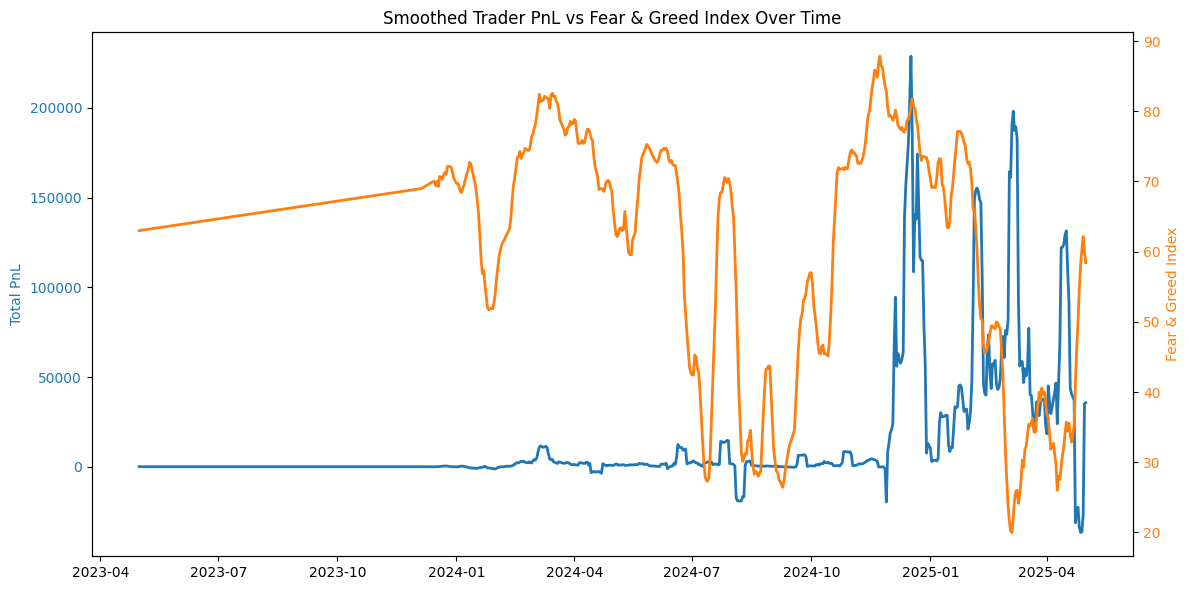

In [21]:
plt.figure(figsize=(12,6))

# Smooth PnL using rolling mean for visibility
daily_pnl['PnL_Smoothed'] = daily_pnl['Closed PnL'].rolling(window=7, min_periods=1).mean()
daily_pnl['Sentiment_Smoothed'] = daily_pnl['value'].rolling(window=7, min_periods=1).mean()

# Plot
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.plot(daily_pnl['date'], daily_pnl['PnL_Smoothed'], color='tab:blue', linewidth=2, label='7-day Avg PnL')
ax1.set_ylabel('Total PnL', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(daily_pnl['date'], daily_pnl['Sentiment_Smoothed'], color='tab:orange', linewidth=2, label='7-day Avg Fear & Greed')
ax2.set_ylabel('Fear & Greed Index', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title('Smoothed Trader PnL vs Fear & Greed Index Over Time')
plt.tight_layout()
plt.show()
